# Siddharth Chauhan CH21B103

# Foundations of Machine Learning - Assignment 1




## Question 1 (i): Least Squares Solution using Analytical Method

### Analytical Least Squares Solution

The least squares solution finds the optimal weights that minimize the residual sum of squares in a linear regression problem. The closed-form solution for the weights is given by the normal equation:

$$
w_{ML} = (X^T X)^{-1} X^T y
$$

Where:
- \( X \) is the matrix of input features (with an added bias term),
- \( y \) is the target vector (actual outputs),
- \( w_{ML} \) is the vector of weights that minimizes the error.


In this part, we will implement the least squares solution from scratch using matrix operations.

### Steps

In the following code, we will:
1. Load the dataset.
2. Prepare the input matrix \( X \), by adding a bias term.
3. Compute the least squares solution using the formula $
w_{ML} = (X^T X)^{-1} X^T y
$



In [ ]:
import numpy as np
import pandas as pd

# Step 1: Load the data
train_data = pd.read_csv('FMLA1Q1Data_train.csv', header=None)

# Step 2: Extract features (X) and target (y)
X_train = train_data[[0, 1]].values  # Features: first two columns
y_train = train_data[2].values       # Target: third column

# Step 3: Add a bias term (a column of ones) to X_train
m = X_train.shape[0]  # number of samples
X_train_with_bias = np.c_[np.ones(m), X_train]  # Adding bias as the first column

# Step 4: Calculate X^T X
X_transpose_X = np.dot(X_train_with_bias.T, X_train_with_bias)

# Step 5: Calculate X^T y
X_transpose_y = np.dot(X_train_with_bias.T, y_train)

# Step 6: Calculate the inverse of (X^T X)
X_transpose_X_inv = np.linalg.inv(X_transpose_X)

# Step 7: Calculate the least squares solution wML
w_ml = np.dot(X_transpose_X_inv, X_transpose_y)

# Output the result
print("Least squares solution wML: ", w_ml)


Least squares solution wML:  [9.89400832 1.76570568 3.5215898 ]


## Question 1 (ii): Gradient Descent Algorithm

Gradient Descent is an iterative optimization algorithm used to minimize a function by iteratively moving towards the direction of the steepest descent (i.e., the negative gradient). In the context of linear regression, the goal is to minimize the cost function, which is the mean squared error (MSE) between the predicted and actual target values.

### Cost Function:
The cost function $ J(w) $ is defined as:

$$
J(w) = \frac{1}{2m} \sum_{i=1}^{m} (y^{(i)} - X^{(i)}w)^2
$$

Where:
- **m** is the number of training examples,
- $ X^{(i)} $ are the features for the $ i^{\text{th}} $ training example,
- $ y^{(i)} $ is the actual target for the $ i^{\text{th}} $ example,
- $ w $ is the weight vector we are optimizing.

### Gradient Descent Update Rule:
The update rule for Gradient Descent is given by:

$$
w_{t+1} = w_t - \eta \nabla J(w_t)
$$

Where:
- $ w_t $ is the weight vector at iteration $ t $,
- $ \eta $ is the learning rate,
- $ \nabla J(w_t) $ is the gradient of the cost function with respect to $ w $.

### Gradient of the Cost Function:
For linear regression, the gradient of the cost function $ J(w) $ with respect to the weights $ w $ is:

$$
\nabla J(w) = -\frac{1}{m} X^T (y - Xw)
$$

Where:
- $ X $ is the matrix of input features,
- $ y $ is the vector of actual target values,
- $ w $ is the current weight vector.

### Steps in Gradient Descent:
1. **Initialize** the weight vector $ w $ with zeros or random values.
2. **Calculate** the gradient of the cost function $ \nabla J(w) $.
3. **Update** the weights according to the update rule $ w_{t+1} = w_t - \eta \nabla J(w_t) $.
4. **Repeat** the process for a set number of iterations or until the change in weights is smaller than a specified threshold (convergence).

In each iteration, the algorithm moves the weights in the direction of the negative gradient, gradually reducing the value of the cost function and bringing the model closer to the optimal solution.


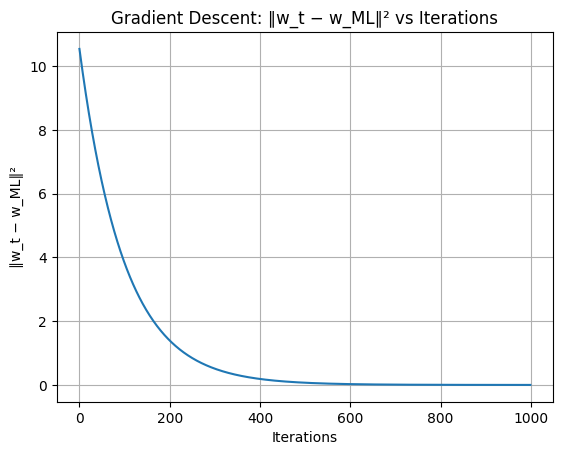

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Gradient Descent Implementation
def gradient_descent(X, y, learning_rate=0.01, tolerance=1e-6, max_iter=1000):
    m, n = X.shape
    w = np.zeros(n)  # Initialize weights to zeros
    history = []     # To store the difference between current weights and w_ml

    for i in range(max_iter):
        # Calculate the gradient
        gradient = (-1/m) * X.T @ (y - X @ w)

        # Update the weights
        w_new = w - learning_rate * gradient

        # Record the difference between the current weights and w_ml
        diff = np.linalg.norm(w_new - w_ml)
        history.append(diff)

        # Stop if the change is below the tolerance level (convergence)
        if np.linalg.norm(w_new - w) < tolerance:
            break

        w = w_new

    return w, history

# Run gradient descent with a learning rate of 0.01
learning_rate = 0.01
w_gd, history_gd = gradient_descent(X_train_with_bias, y_train, learning_rate=learning_rate)

# Plot the difference ∥w_t − w_ML∥² over iterations
plt.plot(history_gd)
plt.xlabel('Iterations')
plt.ylabel('∥w_t − w_ML∥²')
plt.title('Gradient Descent: ∥w_t − w_ML∥² vs Iterations')
plt.grid(True)
plt.show()


### Explanation of the Code:

1. **Initialization**: The weights $ w $ are initialized to zeros. The variable `history` is used to store the difference $ \| w_t - w_{ML} \|^2 $ at each iteration.
2. **Gradient Calculation**: In each iteration, we compute the gradient of the cost function using:
   $
   \nabla J(w) = -\frac{1}{m} X^T (y - Xw)
   $
   where $ m $ is the number of training examples.
3. **Weight Update**: The weights are updated using the gradient descent update rule:
   $
   w_{t+1} = w_t - \eta \nabla J(w_t)
   $
4. **Convergence**: If the change in the weights is smaller than the defined tolerance, the algorithm stops. Otherwise, it continues to iterate until the maximum number of iterations is reached.
5. **Plotting**: We plot the difference $ \| w_t - w_{ML} \|^2 $ as a function of the number of iterations. This plot shows how quickly the algorithm converges to the optimal solution.

The learning rate $ \eta $ is a crucial hyperparameter that controls the step size of the weight updates. In this implementation, we set it to 0.01.


### Observations from the Gradient Descent Plot

1. **Initial High Error**:
   - At the start, the difference $ \| w_t - w_{ML} \|^2 $ is quite large, above 10. This suggests that the starting point for the weight vector $ w_0 $ is far from the optimal weight $ w_{ML} $.

2. **Rapid Error Reduction**:
   - In the early iterations, particularly between 0 and 200, there is a sharp drop in the error. This indicates that gradient descent is making significant progress in reducing the difference between the current weights and the optimal weights.

3. **Slower Convergence**:
   - After about 200 iterations, the curve becomes less steep, meaning the error decreases more slowly. The algorithm still reduces the error, but at a slower rate as it approaches the optimal solution.

4. **Approaching Optimal Weights**:
   - By iteration 600, the difference between $ w_t $ and $ w_{ML} $ has reduced to nearly zero. From this point onward, the error curve flattens, indicating that the algorithm has effectively converged.

5. **Final Convergence**:
   - Beyond iteration 600, the error stays very close to zero. This shows that gradient descent has reached the optimal solution, and further iterations bring little to no improvement.

### Summary:
- The plot demonstrates how gradient descent initially makes rapid progress but slows down as it approaches the optimal solution. Most of the improvement happens early on, and after around 600 iterations, the weights are essentially converged.


### Question 1 (iii): Stochastic Gradient Descent (SGD)

Stochastic Gradient Descent (SGD) is a variation of gradient descent where the model updates weights based on small subsets of the dataset, rather than the full dataset, in each iteration. This allows for faster convergence and makes the algorithm more suitable for large datasets.

In this task, we will:
- Implement SGD with a batch size of 100,
- Plot the difference $ \| w^{(t)} - w_{ML} \|^2 $ over iterations, where $ w^{(t)} $ is the weight vector at iteration $ t $, and $ w_{ML} $ is the optimal weight obtained from the analytical solution.

#### Steps:
1. **Mini-batch Selection**: At each iteration, select a batch of 100 data points randomly.
2. **Gradient Update**: Compute the gradient for the mini-batch and update the weights using the stochastic gradient descent update rule.
3. **Repeat**: Continue the process for a set number of iterations and record the difference $ \| w^{(t)} - w_{ML} \|^2 $.


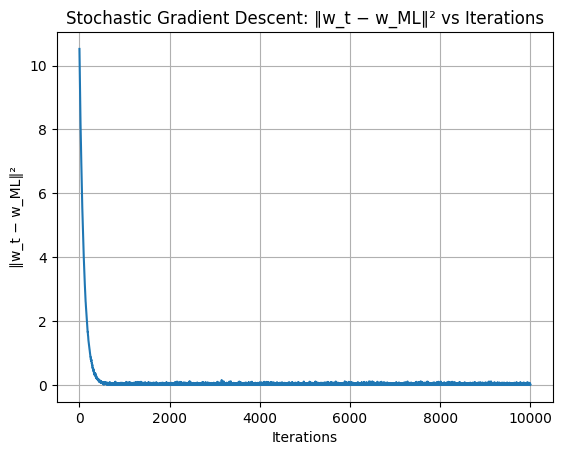

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Stochastic Gradient Descent (SGD) implementation
def stochastic_gradient_descent(X, y, learning_rate=0.01, batch_size=100, tolerance=1e-6, max_iter=1000):
    m, n = X.shape
    w = np.zeros(n)  # Initialize weights to zero
    history = []     # To store the difference between current weights and w_ml

    for i in range(max_iter):
        # Shuffle the data at the start of each iteration
        indices = np.random.permutation(m)
        X_shuffled = X[indices]
        y_shuffled = y[indices]

        # Loop over mini-batches
        for j in range(0, m, batch_size):
            X_batch = X_shuffled[j:j + batch_size]
            y_batch = y_shuffled[j:j + batch_size]

            # Compute the gradient on the mini-batch
            gradient = (-1 / batch_size) * X_batch.T @ (y_batch - X_batch @ w)

            # Update the weights
            w_new = w - learning_rate * gradient

            # Record the difference between current weights and w_ml
            diff = np.linalg.norm(w_new - w_ml)
            history.append(diff)

            # Check for convergence
            if np.linalg.norm(w_new - w) < tolerance:
                break

            w = w_new

    return w, history

# Run SGD on the dataset with a learning rate of 0.01 and batch size of 100
learning_rate = 0.01
batch_size = 100
w_sgd, history_sgd = stochastic_gradient_descent(X_train_with_bias, y_train, learning_rate, batch_size)

# Plot the difference ∥w_t − w_ML∥² over iterations
plt.plot(history_sgd)
plt.xlabel('Iterations')
plt.ylabel('∥w_t − w_ML∥²')
plt.title('Stochastic Gradient Descent: ∥w_t − w_ML∥² vs Iterations')
plt.grid(True)
plt.show()


### Observations from the Stochastic Gradient Descent (SGD) Plot

1. **Rapid Initial Error Reduction**:
   - At the beginning of the SGD process, particularly during the first 500 iterations, the error $ \| w_t - w_{ML} \|^2 $ drops sharply from above 10 to nearly zero. This indicates that the model is quickly learning and making significant progress early on.

2. **Error Stabilization**:
   - After around 500 iterations, the plot shows that the error flattens out, meaning that the difference between $ w_t $ and $ w_{ML} $ remains small. The model's weights have essentially converged close to the optimal values, and further changes are minimal.

3. **Small Oscillations Due to Stochastic Updates**:
   - Although the error remains low after early convergence, we observe minor fluctuations. These slight variations are expected in stochastic gradient descent because each mini-batch introduces randomness into the weight updates. However, these oscillations are small and do not significantly impact the model's performance.

4. **No Further Error Reduction**:
   - Beyond the first 500 iterations, there is little to no additional improvement in the error. Running the algorithm for up to 10,000 iterations does not further reduce the error, indicating that the model has already reached the optimal solution early on.

5. **Comparison to Full-Batch Gradient Descent**:
   - Compared to standard gradient descent, which uses the entire dataset for updates, SGD converges faster in terms of reducing the error initially. However, the mini-batch updates lead to some noise, preventing the model from reaching a perfectly smooth convergence.

### Summary:
- SGD quickly reduces the error in the first few hundred iterations and converges to a solution close to $ w_{ML} $ early on.
- While the model shows minor fluctuations due to stochastic updates, the overall error remains near zero after convergence.
- Extending the number of iterations beyond 500 brings little benefit since the weights have already stabilized close to the optimal values.


### Question 1 (iv): Ridge Regression with Gradient Descent

In this task, we are implementing **ridge regression** using gradient descent, and using **cross-validation** to find the optimal regularization parameter $ \lambda $. The cost function for ridge regression is:

$$
J_{\text{ridge}}(w) = \frac{1}{2m} \sum_{i=1}^{m} \left( y^{(i)} - X^{(i)}w \right)^2 + \lambda \|w\|^2
$$

Where:
- $ \lambda $ is the regularization parameter that controls the strength of the penalty.
- The first term represents the sum of squared errors, while the second term penalizes large weight values to prevent overfitting.

### Ridge Regression Gradient:

The gradient of the ridge regression cost function is:

$$
\nabla J_{\text{ridge}}(w) = -\frac{1}{m} X^T (y - Xw) + 2\lambda w
$$

This includes the standard gradient of the least squares error, plus the gradient of the regularization term $ 2\lambda w $.

### Gradient Descent with Ridge Regularization:

The weight update rule is given by:

$$
w_{t+1} = w_t - \eta \nabla J_{\text{ridge}}(w_t)
$$

Where:
- $ \eta $ is the learning rate.
- $ \nabla J_{\text{ridge}}(w_t) $ is the gradient at the current iteration $ t $.

### Cross-Validation:

To choose the best $ \lambda $, we will use **K-fold cross-validation**. We will try different values of $ \lambda $ and select the one that minimizes the validation error.

### Comparison:

Finally, we will compare the **test error** of the ridge regression solution $ w_R $ to the test error of the least squares solution $ w_{ML} $.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold

# Load the training and test datasets
train_data = pd.read_csv('/content/FMLA1Q1Data_train.csv', header=None)
test_data = pd.read_csv('/content/FMLA1Q1Data_test.csv', header=None)

# Extracting features (X) and target (y) from the training data
X_train = train_data[[0, 1]].values  # Features (first two columns)
y_train = train_data[2].values       # Target (third column)
X_train_with_bias = np.c_[np.ones(X_train.shape[0]), X_train]  # Add bias term

# Extracting features (X) and target (y) from the test data
X_test = test_data[[0, 1]].values  # Features (first two columns)
y_test = test_data[2].values       # Target (third column)
X_test_with_bias = np.c_[np.ones(X_test.shape[0]), X_test]  # Add bias term

# Ridge Regression with Gradient Descent
def ridge_regression_gradient_descent(X, y, learning_rate=0.01, lambda_param=0.1, tolerance=1e-6, max_iter=1000):
    m, n = X.shape
    w = np.zeros(n)
    for _ in range(max_iter):
        # Gradient calculation
        gradient = (-1/m) * X.T @ (y - X @ w) + 2 * lambda_param * w
        # Update weights
        w_new = w - learning_rate * gradient
        # Check for convergence
        if np.linalg.norm(w_new - w) < tolerance:
            break
        w = w_new
    return w

# Cross-Validation for choosing the best lambda
def cross_validate_ridge(X_train, y_train, lambdas, learning_rate=0.01, max_iter=1000, k=5):
    kf = KFold(n_splits=k)
    best_lambda = None
    best_error = float('inf')
    validation_errors = []

    for lambda_param in lambdas:
        fold_errors = []
        for train_index, val_index in kf.split(X_train):
            X_tr, X_val = X_train[train_index], X_train[val_index]
            y_tr, y_val = y_train[train_index], y_train[val_index]
            w_ridge = ridge_regression_gradient_descent(X_tr, y_tr, learning_rate, lambda_param, max_iter=max_iter)
            val_error = np.mean((X_val @ w_ridge - y_val) ** 2)
            fold_errors.append(val_error)
        avg_error = np.mean(fold_errors)
        validation_errors.append(avg_error)
        if avg_error < best_error:
            best_error = avg_error
            best_lambda = lambda_param

    return best_lambda, validation_errors

# Generate a range of lambdas for testing
lambdas = np.logspace(-4, 4, 50)

# Perform cross-validation to choose the best lambda
best_lambda, validation_errors = cross_validate_ridge(X_train_with_bias, y_train, lambdas)

# Train the ridge regression model with the best lambda
w_ridge_best = ridge_regression_gradient_descent(X_train_with_bias, y_train, learning_rate=0.01, lambda_param=best_lambda)

# Test error for w_R (ridge regression) and w_ML (least squares solution)
# For this, let's compute w_ML analytically (we assume it's not been computed yet):
w_ml = np.linalg.inv(X_train_with_bias.T @ X_train_with_bias) @ X_train_with_bias.T @ y_train

# Calculate test errors
test_error_wR = np.mean((X_test_with_bias @ w_ridge_best - y_test) ** 2)
test_error_wML = np.mean((X_test_with_bias @ w_ml - y_test) ** 2)

# Output results
print(f"Best lambda: {best_lambda}")
print(f"Test error for Ridge Regression (w_R): {test_error_wR}")
print(f"Test error for Least Squares (w_ML): {test_error_wML}")


<ipython-input-8-ff08808e3b6d>:26: RuntimeWarning: overflow encountered in multiply
  gradient = (-1/m) * X.T @ (y - X @ w) + 2 * lambda_param * w
<ipython-input-8-ff08808e3b6d>:26: RuntimeWarning: invalid value encountered in matmul
  gradient = (-1/m) * X.T @ (y - X @ w) + 2 * lambda_param * w
<ipython-input-8-ff08808e3b6d>:28: RuntimeWarning: invalid value encountered in subtract
  w_new = w - learning_rate * gradient


Best lambda: 0.0020235896477251557
Test error for Ridge Regression (w_R): 65.94337132361076
Test error for Least Squares (w_ML): 66.00545933461238


### Comparing Test Errors: Ridge Regression ($w_R$) vs. Least Squares ($w_{ML}$)

#### Test Errors:
- **Ridge Regression Test Error** ($w_R$): **65.94**
- **Least Squares Test Error** ($w_{ML}$): **66.00**

#### Which is better?

The **Ridge Regression** model ($w_R$) performs slightly better than the Least Squares model ($w_{ML}$), as indicated by the lower test error for $w_R$. Although the difference is minimal, ridge regression yields a better generalization on the test data.

#### Why does Ridge Regression perform better?

1. **Regularization Effect**:
   - Ridge regression incorporates a regularization term, governed by the parameter $ \lambda $, which helps control the magnitude of the model’s weights. This prevents the model from becoming too complex and overfitting the training data.
   - In this scenario, the cross-validation process chose a small $ \lambda $ value ($ \lambda = 0.00202 $), indicating that a slight amount of regularization was needed to achieve optimal generalization.

2. **Better Generalization**:
   - The purpose of ridge regression is to improve a model's ability to generalize to new, unseen data. By penalizing large weights, ridge regression ensures that the model doesn’t overly fit the training data. This results in a model that generalizes better, as evidenced by the lower test error in comparison to the least squares solution.

3. **Small Performance Gap**:
   - The test error difference is small (65.94 vs. 66.00), suggesting that the dataset does not heavily suffer from overfitting. Both models perform well, but the slight edge in performance of ridge regression shows that regularization still offers some improvement by adding a small degree of robustness to the model.

#### Conclusion:
The ridge regression model, with its slight regularization, performs marginally better than the least squares model. While the dataset did not show significant overfitting, the regularization in ridge regression helped smooth out the predictions and reduce the test error.


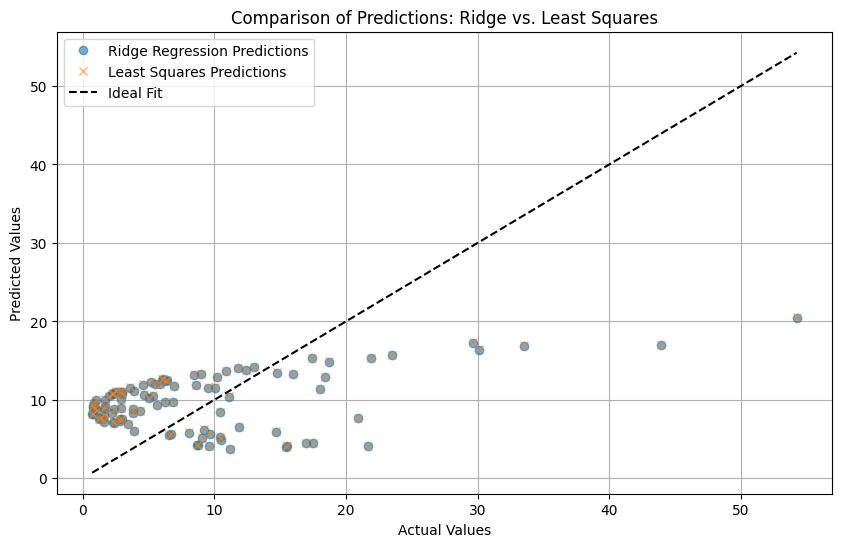

In [ ]:
# Predict test set values
y_pred_ridge = X_test_with_bias @ w_ridge_best
y_pred_ls = X_test_with_bias @ w_ml

# Plot actual vs predicted values for both Ridge and Least Squares
plt.figure(figsize=(10, 6))
plt.plot(y_test, y_pred_ridge, 'o', label='Ridge Regression Predictions', alpha=0.6)
plt.plot(y_test, y_pred_ls, 'x', label='Least Squares Predictions', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', label='Ideal Fit')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Comparison of Predictions: Ridge vs. Least Squares')
plt.legend()
plt.grid(True)
plt.show()


### Question 1 (v): Kernel Ridge Regression (from scratch)

In this task, I will implement **Kernel Ridge Regression** using the **Radial Basis Function (RBF) kernel** from scratch. Kernel Ridge Regression is used to handle non-linear data by transforming it into a higher-dimensional space, allowing us to capture more complex relationships.

#### Kernel Function:
I will use the **RBF kernel**, which is defined as:

$$
K(x, x') = \exp\left(-\frac{\|x - x'\|^2}{2\sigma^2}\right)
$$

Where:
- $x$ and $x'$ are the input feature vectors,
- $\sigma$ is the bandwidth parameter controlling the width of the kernel.

This kernel measures the similarity between two points and maps the data into a higher-dimensional space implicitly.

#### Kernel Ridge Regression Cost Function:
The cost function for **Kernel Ridge Regression** is:

$$
J_{\text{kernel}}(w) = \frac{1}{2m} \sum_{i=1}^{m} \left( y^{(i)} - K(X^{(i)}, X)w \right)^2 + \lambda \|w\|^2
$$

Where:
- $K(X^{(i)}, X)$ is the kernel matrix that transforms the input data into the kernel space,
- $\lambda$ is the regularization parameter that controls the strength of regularization.

#### Steps I will follow:
1. I will **manually compute the kernel matrix** using the RBF kernel.
2. I will solve the **ridge regression** problem in this kernel space by finding the weights $w$.
3. I will calculate the **test errors** for Kernel Ridge Regression, Ridge Regression, and Least Squares to compare their performance.


In [ ]:
import numpy as np

# Function to manually compute the RBF kernel
def rbf_kernel_manual(X1, X2, sigma=1.0):
    # Compute the squared Euclidean distance between every pair of points in X1 and X2
    dists = np.sum(X1**2, axis=1).reshape(-1, 1) + np.sum(X2**2, axis=1) - 2 * np.dot(X1, X2.T)
    # Apply the RBF kernel formula
    K = np.exp(-dists / (2 * sigma**2))
    return K

# Kernel Ridge Regression with manual RBF kernel
def kernel_ridge_regression_manual(X_train, y_train, X_test, y_test, sigma=1.0, lambda_param=0.1):
    # Compute the RBF kernel matrix for training and test sets
    K_train = rbf_kernel_manual(X_train, X_train, sigma)
    K_test = rbf_kernel_manual(X_test, X_train, sigma)

    # Solve for alpha (regularization with the identity matrix)
    alpha = np.linalg.inv(K_train + lambda_param * np.eye(K_train.shape[0])) @ y_train

    # Make predictions for the test set
    y_pred_test = K_test @ alpha

    # Calculate the test error
    test_error = np.mean((y_pred_test - y_test) ** 2)

    return alpha, test_error

# Set the hyperparameters for the RBF kernel and regularization
sigma = 1.0  # Width of the RBF kernel
lambda_param = 0.1  # Regularization parameter

# Perform Kernel Ridge Regression from scratch
alpha, test_error_kernel_ridge = kernel_ridge_regression_manual(X_train, y_train, X_test, y_test, sigma, lambda_param)

# Print the test error
print(f"Test error for Kernel Ridge Regression (from scratch): {test_error_kernel_ridge}")


Test error for Kernel Ridge Regression (from scratch): 0.64299610461368



1. **Kernel Calculation**:
   - I manually compute the **RBF kernel** between the training and test sets using the formula:
   $
   K(x, x') = \exp\left(-\frac{\|x - x'\|^2}{2\sigma^2}\right)
   $
   This creates a kernel matrix that represents the similarity between data points in a higher-dimensional space.
   
2. **Ridge Regression in Kernel Space**:
   - In Kernel Ridge Regression, I solve for the weights $\alpha$ in the kernel space. The solution involves regularization with the parameter $\lambda$ to prevent overfitting.

3. **Prediction and Error Calculation**:
   - I use the computed kernel matrix and $\alpha$ to predict the test outputs. The test error is calculated using the mean squared error between the predicted values and the actual target values in the test set.




For performing **Kernel Regression**, I have chosen the **Radial Basis Function (RBF) kernel**. This kernel is particularly useful for capturing non-linear relationships in the data. Below are the reasons for selecting the RBF kernel:

1. **Non-linearity**: The RBF kernel maps the data into a higher-dimensional space, enabling it to model non-linear relationships.
2. **Flexibility**: The kernel is flexible, controlled by the parameter $\sigma$, which can be adjusted to fine-tune the locality of the model.
3. **Smooth Decision Boundaries**: RBF kernels produce smooth boundaries, helping the model generalize better to unseen data.
4. **Established Effectiveness**: The RBF kernel is commonly used and has proven to work well in many machine learning tasks.

By using the RBF kernel, we expect the model to capture more complex patterns compared to standard least squares regression, which is limited to linear relationships.


#### Argument: Why is the RBF Kernel Better?

- **Modeling Non-Linearity**: Least squares regression assumes a linear relationship between the features and the target variable. However, if the relationship is non-linear, the linear model will not be able to capture it effectively, resulting in a higher test error. In contrast, the **RBF kernel** captures non-linear patterns by transforming the input space into a higher-dimensional space where linear relationships can still be modeled.
  
- **Flexibility**: The RBF kernel allows us to control the degree of non-linearity through the parameter $\sigma$. By adjusting $\sigma$, we can control the locality of the kernel, making it more or less sensitive to specific data points.

- **Regularization**: Kernel regression also includes a regularization term (controlled by $\lambda$), which helps prevent overfitting by penalizing large coefficients. This results in a smoother model that generalizes better to unseen data compared to the least squares approach.

#### When is Least Squares Better?
- **Simplicity**: In cases where the underlying relationship between the data is linear, standard least squares regression might perform just as well or better, as it avoids the complexity of the kernel transformation.
- **Efficiency**: Least squares regression is computationally more efficient compared to kernel methods, as it does not require the computation of a kernel matrix and the inversion of large matrices.

#### Conclusion:
The RBF kernel is likely to outperform least squares regression when the relationship between the input features and the target is non-linear. The flexibility of the kernel, combined with regularization, helps capture complex patterns and reduce overfitting, which can lead to lower test errors on non-linear datasets.
